# **IMPORT DATASET**

In [ ]:
import pandas as pd

df=pd.read_csv("/content/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# **PREPROCESSING**

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
#Split into target and predictor
x=df.drop(['label'],axis=1)
y=df['label']

#Encoding for converting crop names to numbers as 0,1,2..
le=LabelEncoder()
y_encoded=le.fit_transform(y)

#Coverts all features to same scales
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


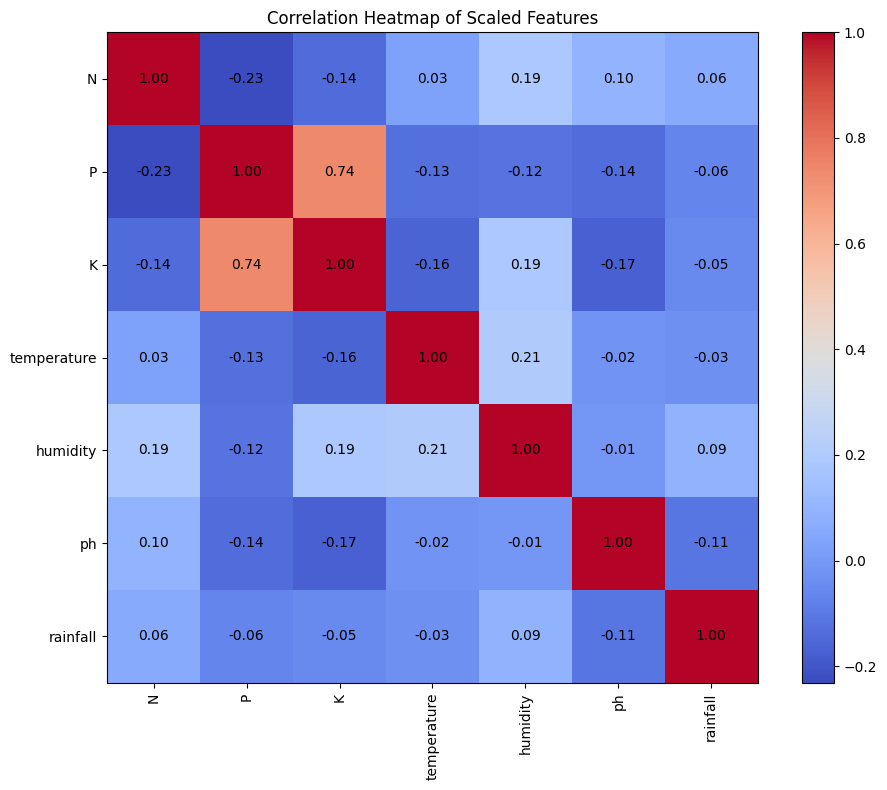

In [ ]:
# 3. Correlation Heatmap for scaled features
corr = x_scaled_df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(len(x.columns)), labels=x.columns, rotation=90)
plt.yticks(ticks=np.arange(len(x.columns)), labels=x.columns)
plt.title("Correlation Heatmap of Scaled Features")
for i in range(len(x.columns)):
    for j in range(len(x.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

# **INSIGHTS**

1.The strongest connection is between Phosphorus (P) and Potassium (K). Their correlation is 0.74, which is quite high. This means that when the soil has more phosphorus, it usually also has more potassium. This makes sense because some crops like banana, sugarcane, and coconut need both of these nutrients in high amounts.

2.There's a slight negative relationship between Nitrogen (N) and Phosphorus (P). This means when nitrogen is high, phosphorus might be a bit lower — but it's not a strong rule. It's just a weak trend.

3.Temperature and humidity have a very weak positive relationship. That means slightly higher temperatures might come with a bit more humidity. But again, it’s not strong. This is great because it shows your data includes crops from dry-hot and wet-hot places — giving a good variety.

4.It’s surprising, but rainfall and humidity show almost no connection. So, even if a place gets a lot of rain, it doesn’t always stay humid. That might depend on things like how fast water dries up or drains away.

5.Soil pH (how acidic or basic the soil is) doesn’t relate much to anything else. It’s totally separate from things like nutrients, temperature, or rainfall. This is useful — it gives unique information to your model that’s not found in other features.



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


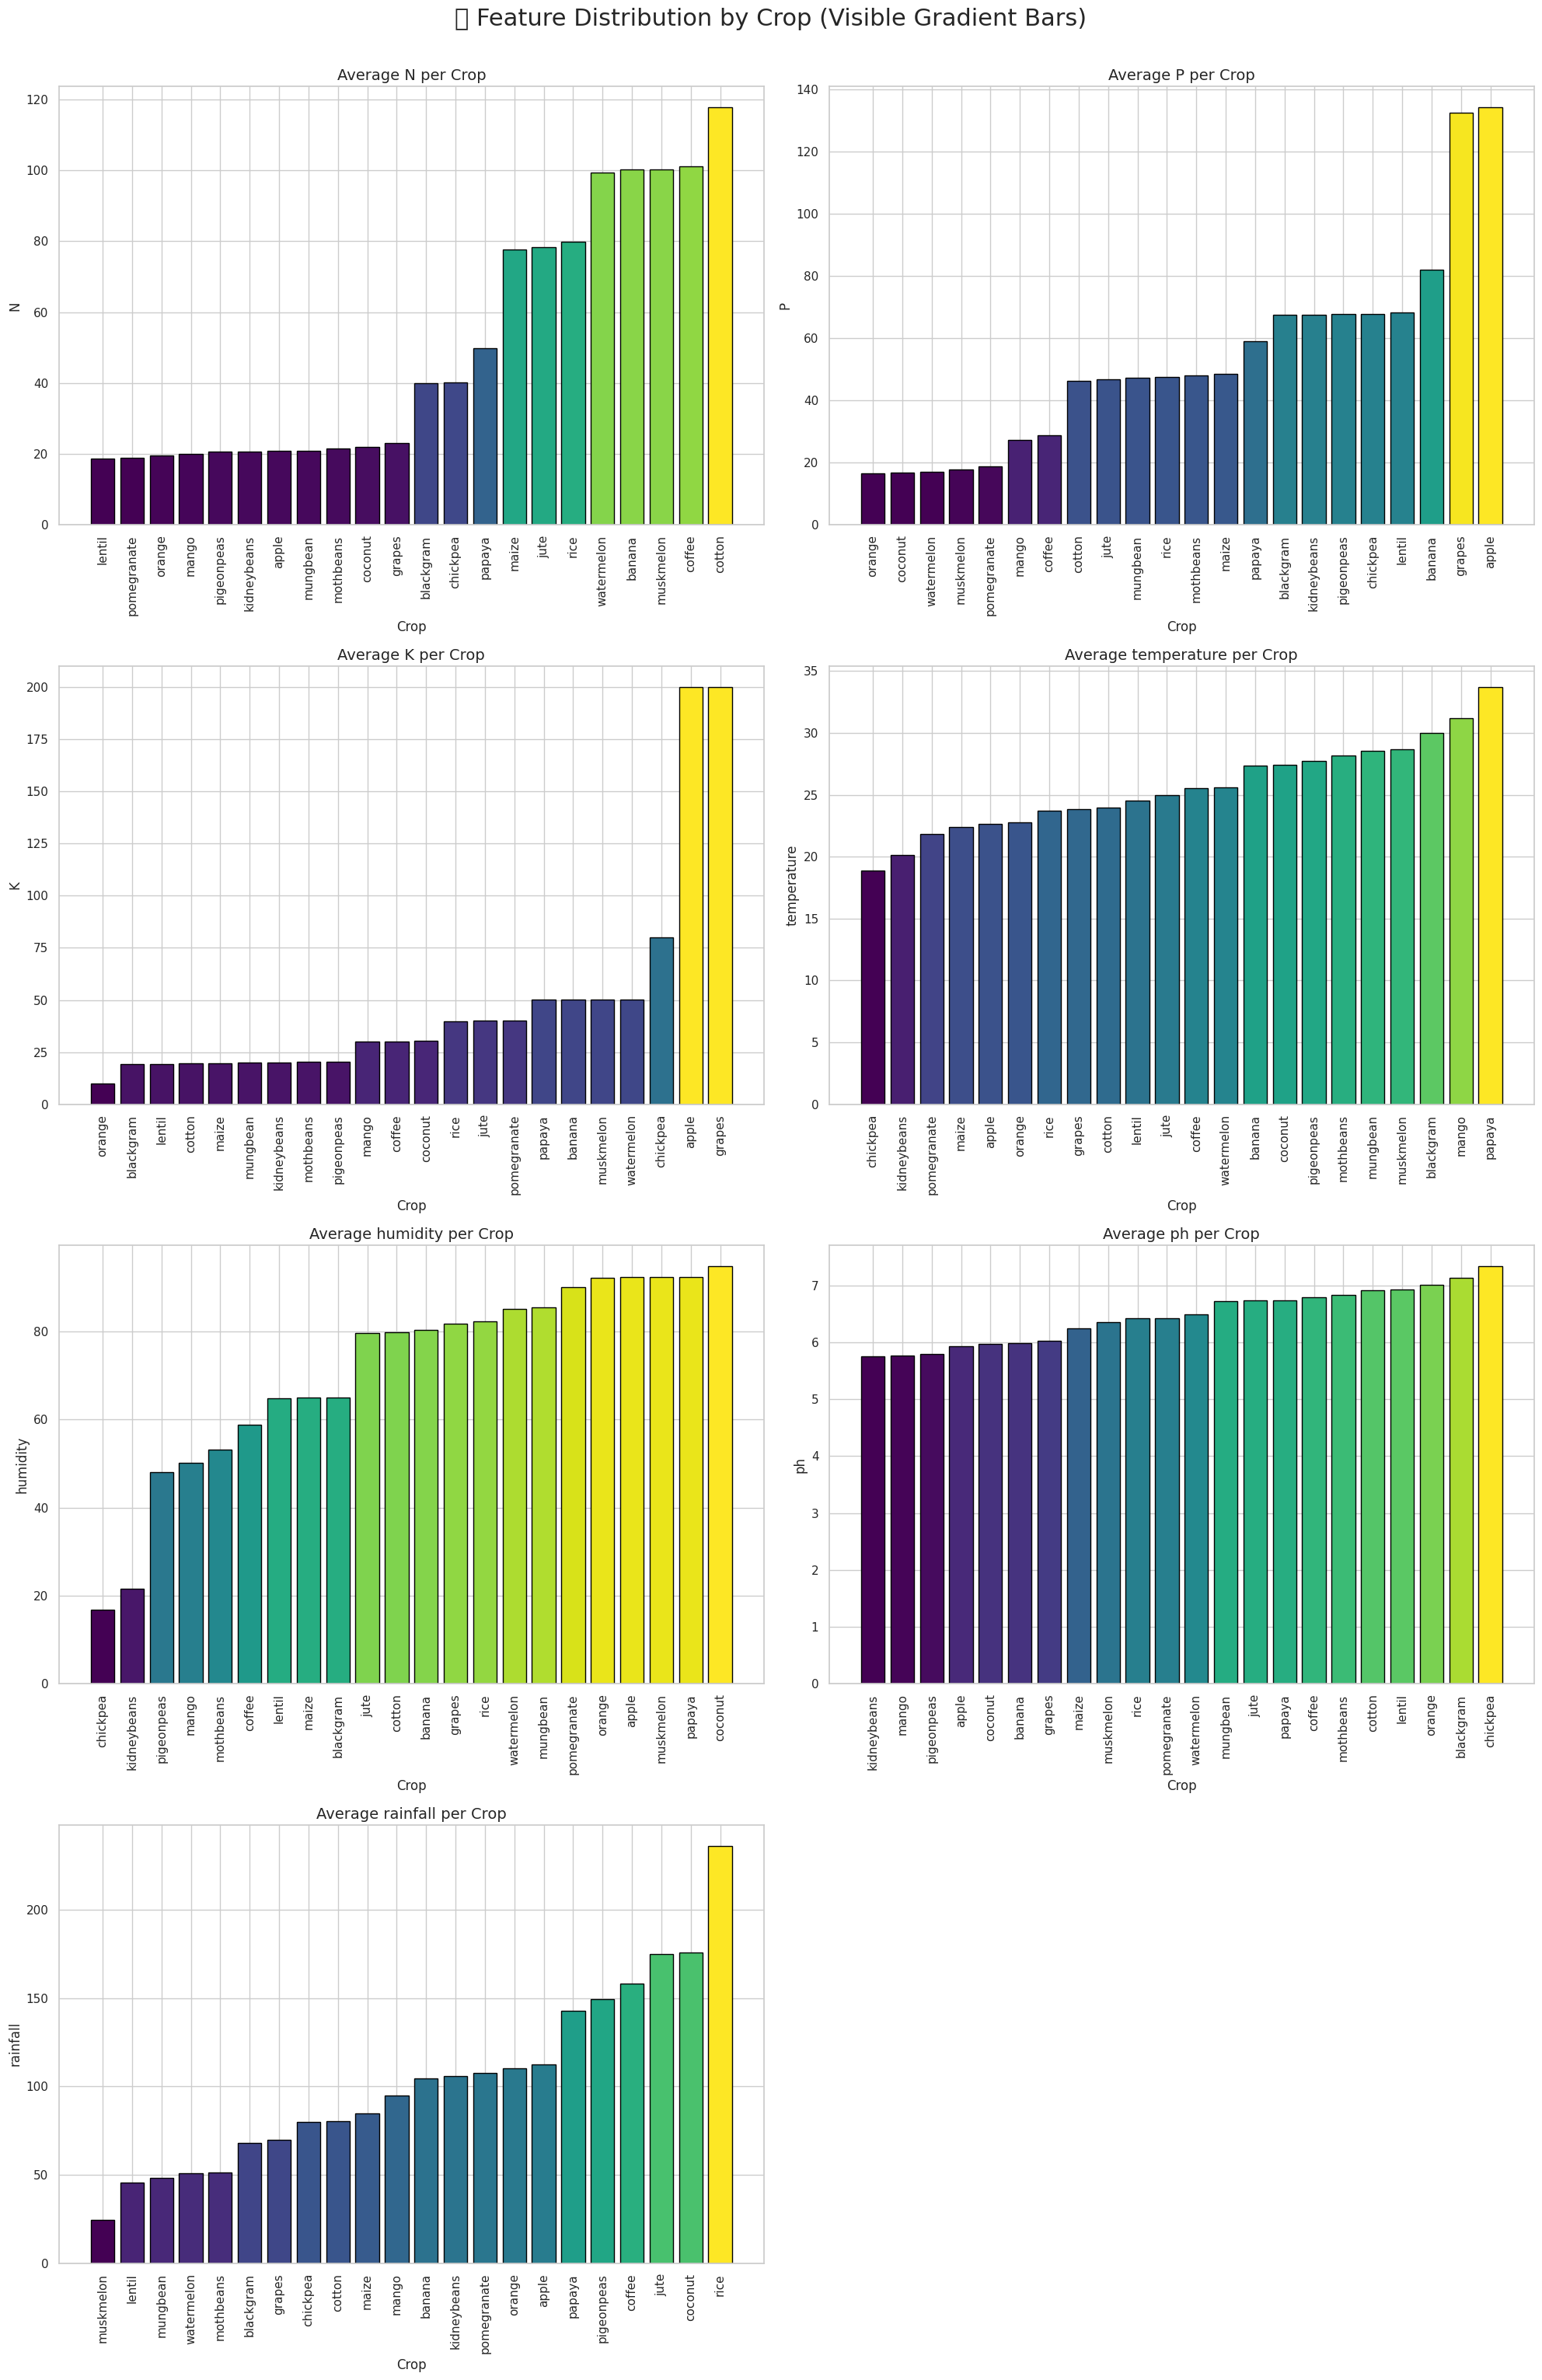

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

grouped = df.groupby('label').mean(numeric_only=True)
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

plt.figure(figsize=(20, 30))

for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)
    feature_values = grouped[feature].sort_values()

    cmap = plt.cm.viridis
    norm = mcolors.Normalize(vmin=feature_values.min(), vmax=feature_values.max())
    colors = cmap(norm(feature_values.values))

    plt.bar(feature_values.index, feature_values.values, color=colors, edgecolor='black')
    plt.title(f"Average {feature} per Crop", fontsize=14)
    plt.xlabel("Crop")
    plt.ylabel(feature)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.suptitle("Feature Distribution by Crop (Visible Gradient Bars)", fontsize=22, y=1.02)
plt.show()


# **INSIGHTS**

1.**NITROGEN** - Crops like rice, maize, wheat require high nitrogen.Crops like kidneybeans, lentil, mothbeans thrive with lower nitrogen.

2.**PHOSPHORUS** - Pomegranate, sugarcane need high phosphorus. Kidneybeans, lentil, chickpea manage with low phosphorus.

3.**POTASSIUM** - Sugarcane, banana, coconut need very high potassium.Blackgram, mothbeans, chickpea → need much lower potassium.

4.**TEMPERATURE** - Apple, kidneybeans, coffee grow in cooler climates.Mango, watermelon, cotton need higher temperature.

5.**HUMIDITY** - Kidneybeans, pigeonpeas need low humidity.Rice, coconut, banana, papaya need high humidity.

6.**pH** -  Lentil, blackgram, mothbeans prefer neutral to slightly acidic soil.Pomegranate, coffee can grow in slightly acidic soil

7.**RAINFALL(mm)** - Jute, rice, sugarcane need high rainfall.Kidneybeans, chickpea, lentil survive on low rainfall
           

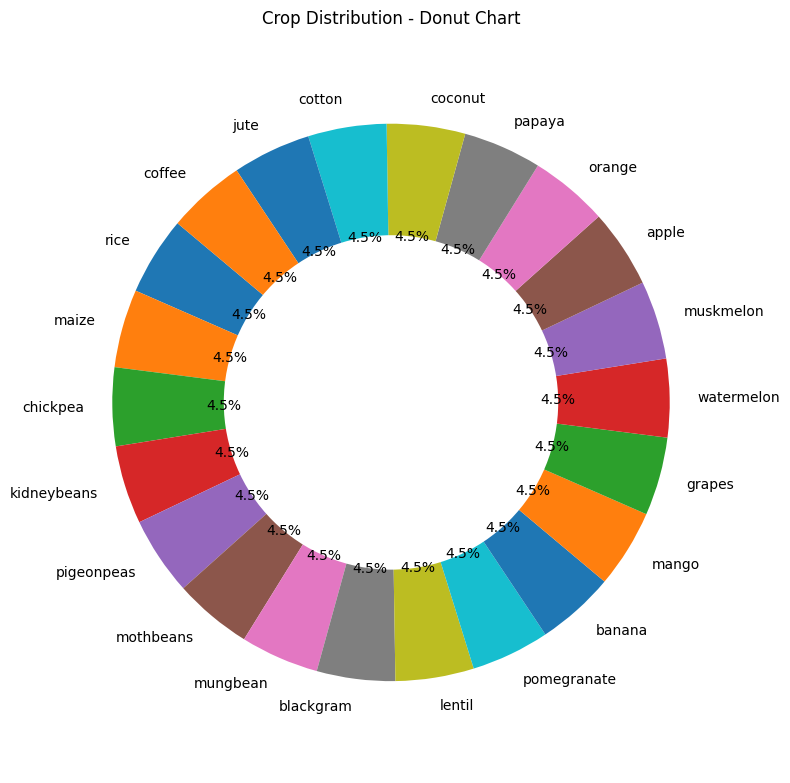

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

crop_counts = df['label'].value_counts()
labels = crop_counts.index
sizes = crop_counts.values

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140
)

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Crop Distribution - Donut Chart")
plt.axis('equal')
plt.tight_layout()
plt.show()


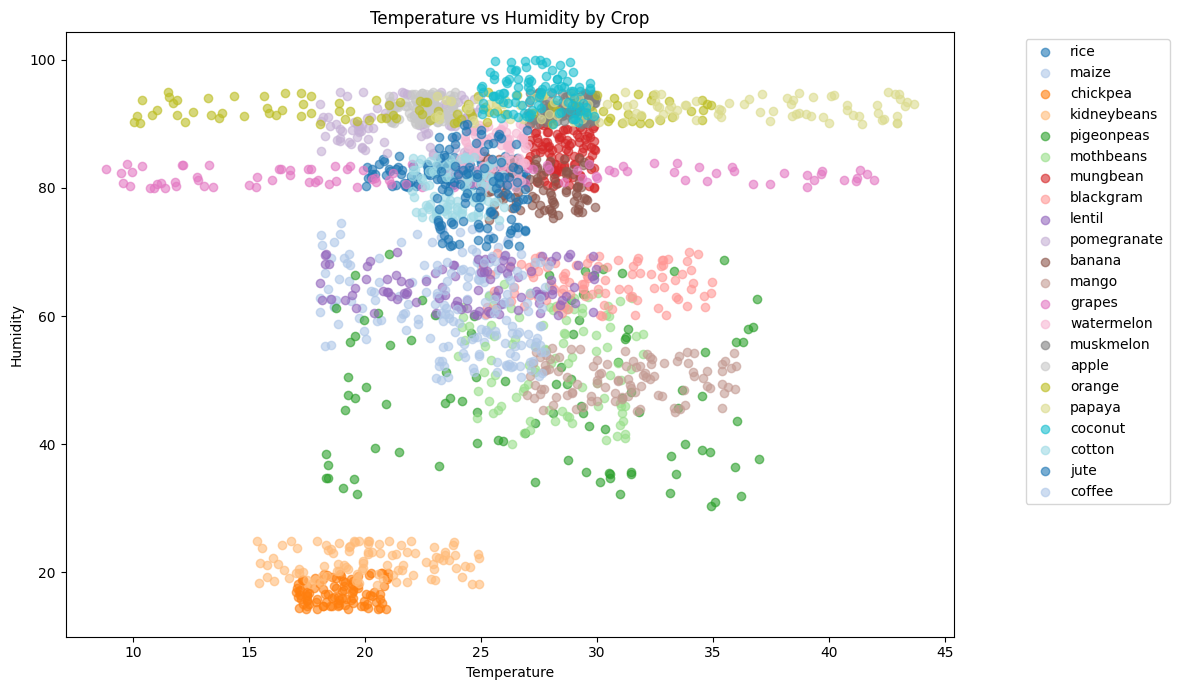

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Crop_recommendation.csv")

# Choose two features to compare
x_feature = 'temperature'
y_feature = 'humidity'

# Create a list of unique crops and assign colors
crops = df['label'].unique()
colors = plt.cm.tab20.colors  # Up to 20 different colors

plt.figure(figsize=(12, 7))
for i, crop in enumerate(crops):
    subset = df[df['label'] == crop]
    plt.scatter(subset[x_feature], subset[y_feature], label=crop, color=colors[i % 20], alpha=0.6)

plt.xlabel(x_feature.capitalize())
plt.ylabel(y_feature.capitalize())
plt.title(f"{x_feature.capitalize()} vs {y_feature.capitalize()} by Crop")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# **Insights From TEMPERATURE and HUMIDITY**

1.Chickpea  -  Adapted to dry areas with cooling climate.

2.Rice      -  Adapted to warm temperature and high humidity.

# **MODEL TRAINING**

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler

#Load model
df=pd.read_csv("/content/Crop_recommendation.csv")
df.head()

#PREPROCESSING
#Split into target and predictor
x=df.drop(['label'],axis=1)
y=df['label']

#Encoding for converting crop names to numbers as 0,1,2..
le=LabelEncoder()
y_encoded=le.fit_transform(y)

#Coverts all features to same scales
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

#MODEL TRAINING
#Split into training and testing
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_encoded,test_size=0.2,random_state=42)

#Train the model
model=RandomForestClassifier()
model.fit(x_train,y_train)

#Predict the test data
y_pred=model.predict(x_test)

#Accuracy
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)


Accuracy: 0.9954545454545455


# **TESTING WITH SAMPLE DATA**

In [ ]:
import pandas as pd

sample = pd.DataFrame([{
    'N': 131,
    'P': 48,
    'K': 25,
    'temperature': 22.0,
    'humidity': 76.0,
    'ph': 6.5,
    'rainfall': 77.0
}])

sample_scaled = scaler.transform(sample)

prediction = model.predict(sample_scaled)
predicted_crop = le.inverse_transform(prediction)

print("🌱 Recommended Crop:", predicted_crop[0])


🌱 Recommended Crop: cotton


# **HUGGING FACE DEPLOYMENT**


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
import pickle

#Load model
df=pd.read_csv("/content/Crop_recommendation.csv")
df.head()

#PREPROCESSING
#Split into target and predictor
x=df.drop(['label'],axis=1)
y=df['label']

#Encoding for converting crop names to numbers as 0,1,2..
le=LabelEncoder()
y_encoded=le.fit_transform(y)

#Coverts all features to same scales
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

#MODEL TRAINING
#Split into training and testing
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_encoded,test_size=0.2,random_state=42)

#Train the model
model=RandomForestClassifier()
model.fit(x_train,y_train)

#Predict the test data
y_pred=model.predict(x_test)

#Accuracy
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

with open("crop_recommendation.pkl","wb") as f:
  pickle.dump(model,f)

with open("scaler.pkl","wb") as f:
  pickle.dump(scaler,f)

with open("label_encoder.pkl","wb") as f:
  pickle.dump(le,f)

from google.colab import files
files.download("crop_recommendation.pkl")
files.download("scaler.pkl")
files.download("label_encoder.pkl")

Accuracy: 0.9931818181818182


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import gradio as gr
import pickle
import numpy as np
import pandas as pd

# Load model, scaler, and label encoder
with open("crop_recommendation.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

# Define prediction function
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    input_data = pd.DataFrame([{
        "N": N,
        "P": P,
        "K": K,
        "temperature": temperature,
        "humidity": humidity,
        "ph": ph,
        "rainfall": rainfall
    }])

    scaled_data = scaler.transform(input_data)
    prediction = model.predict(scaled_data)
    crop_name = le.inverse_transform(prediction)[0]
    return f"🌱 Recommended Crop: {crop_name}"

# Gradio interface
interface = gr.Interface(
    fn=predict_crop,
    inputs=[
        gr.Number(label="Nitrogen (N)"),
        gr.Number(label="Phosphorus (P)"),
        gr.Number(label="Potassium (K)"),
        gr.Number(label="Temperature (°C)"),
        gr.Number(label="Humidity (%)"),
        gr.Number(label="pH"),
        gr.Number(label="Rainfall (mm)")
    ],
    outputs="text",
    title="🌾 Crop Recommendation System",
    description="Enter soil and climate values to get the most suitable crop."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://db7c977a02508b8513.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
app_code= '''
import gradio as gr
import pickle
import numpy as np
import pandas as pd

# Load model, scaler, and label encoder
with open("crop_recommendation.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

# Define prediction function
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    input_data = pd.DataFrame([{
        "N": N,
        "P": P,
        "K": K,
        "temperature": temperature,
        "humidity": humidity,
        "ph": ph,
        "rainfall": rainfall
    }])

    scaled_data = scaler.transform(input_data)
    prediction = model.predict(scaled_data)
    crop_name = le.inverse_transform(prediction)[0]
    return f"🌱 Recommended Crop: {crop_name}"

# Gradio interface
interface = gr.Interface(
    fn=predict_crop,
    inputs=[
        gr.Number(label="Nitrogen (N)"),
        gr.Number(label="Phosphorus (P)"),
        gr.Number(label="Potassium (K)"),
        gr.Number(label="Temperature (°C)"),
        gr.Number(label="Humidity (%)"),
        gr.Number(label="pH"),
        gr.Number(label="Rainfall (mm)")
    ],
    outputs="text",
    title="🌾 Crop Recommendation System",
    description="Enter soil and climate values to get the most suitable crop."
)

interface.launch()
'''

with open("/content/app.py","w") as f:
  f.write(app_code)

from google.colab import files
files.download("/content/app.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
requirements='''
gradio
scikit-learn
numpy
pandas
'''

with open("/content/requirements.txt","w") as f:
  f.write(requirements)

from google.colab import files
files.download("/content/requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **FASTAPI DEPLOYMENT**

In [ ]:
%%writefile app_using_FastAPI.py
from fastapi import FastAPI
import gradio as gr
import pickle
import numpy as np

# Load model, scaler, and label encoder
with open("crop_recommendation.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

# Define prediction function
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    input_data = pd.DataFrame([{
        "N": N,
        "P": P,
        "K": K,
        "temperature": temperature,
        "humidity": humidity,
        "ph": ph,
        "rainfall": rainfall
    }])

    scaled_data = scaler.transform(input_data)
    prediction = model.predict(scaled_data)
    crop_name = le.inverse_transform(prediction)[0]
    return f"🌱 Recommended Crop: {crop_name}"

# Gradio interface
interface = gr.Interface(
    fn=predict_crop,
    inputs=[
        gr.Number(label="Nitrogen (N)"),
        gr.Number(label="Phosphorus (P)"),
        gr.Number(label="Potassium (K)"),
        gr.Number(label="Temperature (°C)"),
        gr.Number(label="Humidity (%)"),
        gr.Number(label="pH"),
        gr.Number(label="Rainfall (mm)")
    ],
    outputs="text",
    title="🌾 Crop Recommendation System",
    description="Enter soil and climate values to get the most suitable crop."
)

app=FastAPI()
app=gr.mount_gradio_app(app,interface,path="/")

Writing app_using_FastAPI.py


In [ ]:
import uvicorn
uvicorn.run("app_using_FastAPI:app" ,host="0.0.0.0" ,port=8000)

INFO:     Started server process [479]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     121.200.55.210:0 - "GET / HTTP/1.1" 307 Temporary Redirect
INFO:     121.200.55.210:0 - "GET // HTTP/1.1" 200 OK
INFO:     121.200.55.210:0 - "GET //assets/index-Ccc2t4AG.js HTTP/1.1" 200 OK
INFO:     121.200.55.210:0 - "GET //assets/index-Dz5CWoA7.css HTTP/1.1" 200 OK
INFO:     121.200.55.210:0 - "GET //assets/svelte/svelte.js HTTP/1.1" 200 OK
INFO:     121.200.55.210:0 - "GET //assets/Embed-yYAfXBkj.js HTTP/1.1" 200 OK
INFO:     121.200.55.210:0 - "GET //assets/Index-BzI0zy4H.js HTTP/1.1" 200 OK
INFO:     121.200.55.210:0 - "GET //assets/DownloadLink.svelte_svelte_type_style_lang-C_5UIfol.js HTTP/1.1" 200 OK
INFO:     121.200.55.210:0 - "GET //assets/IconButtonWrapper-BqcF4N5S.css HTTP/1.1" 200 OK
INFO:     121.200.55.210:0 - "GET //assets/index-BFBcOI-E.js HTTP/1.1" 200 OK
INFO:     121.200.55.210:0 - "GET //assets/MarkdownCode-Dw1-H2nG.css HTTP/1.1" 200 OK
INFO:     121.200.55.210:0 - "GET //assets/prism-python-D8O99YiR.js HTTP/1.1" 200 OK
INFO:     121.200.55.210:0 - "GE

INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [479]


In [ ]:
!pip install pyngrok
from pyngrok import ngrok
import nest_asyncio
import uvicorn

nest_asyncio.apply()
ngrok.set_auth_token("2zqkXHl03qU9Su6Ji56EDKWRGxf_7QJHudD7X8CgfaGhmTT99")
public_url=ngrok.connect(8000)
print(f"Public URL: {public_url}")

ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-7' coro=<Server.serve() done, defined at /usr/local/lib/python3.11/dist-packages/uvicorn/server.py:69> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/main.py", line 580, in run
    server.run()
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 67, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    se

Public URL: NgrokTunnel: "https://b6c1b70f730a.ngrok-free.app" -> "http://localhost:8000"


/tmp/ipython-input-30-218941584.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


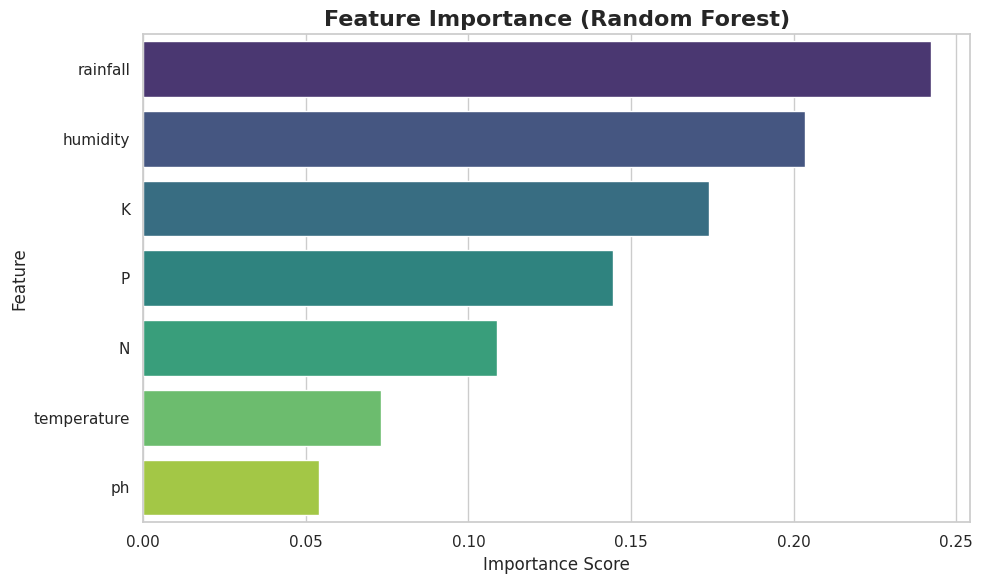

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# After training your model
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
importances = model.feature_importances_

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)', fontsize=16, weight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
